In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.78, # optimum = .8196
)

#env = gym.make('FrozenLake-v0')
env = gym.make('FrozenLakeNotSlippery-v0')

In [3]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
#Q = np.random.rand(env.observation_space.n, env.action_space.n)
lr = 0.8
y = 0.95
num_episodes = 2000
#create list to contain total rewards per episode
rList = []

for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + (np.random.randn(1, env.action_space.n) * (1./(i**2 + 1))))
        #Get new state and reward from environment
        s1, r, d, _ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y * np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    rList.append(rAll)

print('Score over time: {}'.format(sum(rList)/num_episodes))
print('Final Q-Table Values')
print(Q)
    

    



Score over time: 0.9545
Final Q-Table Values
[[0.         0.         0.77378094 0.        ]
 [0.         0.         0.81450625 0.        ]
 [0.         0.857375   0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.95       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


In [4]:
s = env.reset()
d = 0
j = 0
while j < 99:
    #env.render()
    j+=1
    a = np.argmax(Q[s,:] )
    #Get new state and reward from environment
    s1, r, d, _ = env.step(a)
    s = s1
    if d == True:
        break

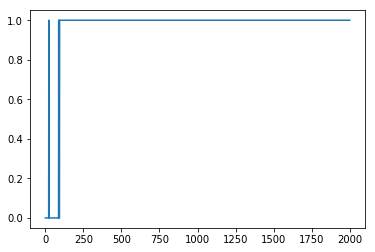

In [5]:
plt.plot(rList)